In [325]:
import pandas as pd
import numpy as np
import math

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

from numpy import array
from numpy import hstack

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, BatchNormalization
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Activation
from tensorflow.keras.activations import relu

from sklearn.multioutput import MultiOutputRegressor, RegressorChain
import lightgbm
from lightgbm import LGBMRegressor
from sklearn.multioutput import MultiOutputRegressor, RegressorChain

import matplotlib.pyplot as plt



In [326]:
user_balance=pd.read_csv('/Users/yupengshen/DA_portfolio/cashflow/data/user_balance_table.csv')
user_balance['report_date'] = pd.to_datetime(user_balance['report_date'], format='%Y%m%d')
user_balance.sort_values(by='report_date', inplace=True)
data = user_balance.groupby(['report_date']).sum()


In [327]:
data

,user_id,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
report_date,,,,,,,,,,,,,,,,,
2013-07-01,6305946,252327861,225364535,32488348,32458786,21250722,11208064,5525022,382160,5142862,5142862,0,29562,0.0,89350.0,0.0,292810.0
2013-07-02,6776722,278810703,252327861,29037390,29007510,16561183,12446327,2554548,350066,2204482,2204482,0,29880,0.0,1650.0,0.0,348416.0
2013-07-03,7025037,300127606,278810703,27270770,27234156,20493660,6740496,5953867,454406,5499461,5499461,0,36614,0.0,69764.0,0.0,384642.0
2013-07-04,7334624,312038062,300127606,18321185,18282230,12108178,6174052,6410729,535391,5875338,5875338,0,38955,25078.0,107500.0,0.0,402813.0
2013-07-05,7603689,320923224,312038062,11648749,11607991,6930431,4677560,2763587,697926,2065661,2065661,0,40758,0.0,51100.0,0.0,646826.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-27,175954982,20171681280,20337650626,302194801,299973007,102372488,197600519,468164147,107408171,360755976,20966937,339789039,2221794,34053795.0,19426628.0,6000000.0,47927748.0
2014-08-28,176340561,20118870170,20171681280,245082751,242887647,56734596,186153051,297893861,98896299,198997562,15732174,183265388,2195104,25606866.0,25743565.0,4000000.0,43545868.0
2014-08-29,177016484,20112668503,20118870170,267554713,265335172,87236719,178098453,273756380,103967802,169788578,27979322,141809256,2219541,31191914.0,30028785.0,40000.0,42707103.0


In [328]:
train_data = data.iloc[0:396]
test_data = data.iloc[396:427]

In [329]:
train_data

,user_id,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
report_date,,,,,,,,,,,,,,,,,
2013-07-01,6305946,252327861,225364535,32488348,32458786,21250722,11208064,5525022,382160,5142862,5142862,0,29562,0.0,89350.0,0.0,292810.0
2013-07-02,6776722,278810703,252327861,29037390,29007510,16561183,12446327,2554548,350066,2204482,2204482,0,29880,0.0,1650.0,0.0,348416.0
2013-07-03,7025037,300127606,278810703,27270770,27234156,20493660,6740496,5953867,454406,5499461,5499461,0,36614,0.0,69764.0,0.0,384642.0
2013-07-04,7334624,312038062,300127606,18321185,18282230,12108178,6174052,6410729,535391,5875338,5875338,0,38955,25078.0,107500.0,0.0,402813.0
2013-07-05,7603689,320923224,312038062,11648749,11607991,6930431,4677560,2763587,697926,2065661,2065661,0,40758,0.0,51100.0,0.0,646826.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-07-27,168917562,20122693255,20137897656,151406251,149177264,80780644,68396620,166610652,50588888,116021764,35246941,80774823,2228987,18664858.0,20466300.0,0.0,11457730.0
2014-07-28,169485674,20148469102,20122693255,371762756,369535407,214062345,155473062,345986909,51656382,294330527,30372288,263958239,2227349,25389413.0,11015923.0,2200000.0,13051046.0
2014-07-29,169232315,20073082045,20148469102,228093046,225904582,85325202,140579380,303480103,41066657,262413446,23956498,238456948,2188464,12428323.0,12717118.0,3000000.0,12921216.0


In [330]:
test_data

,user_id,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
report_date,,,,,,,,,,,,,,,,,
2014-08-01,170153578,20069760015,19947416138,374884735,372678958,135715324,236963634,252540858,84227601,168313257,31013339,137299918,2205777,32731901.0,29456809.0,5100000.0,16938891.0
2014-08-02,169838291,20086601920,20069760015,189092130,186889349,78478704,108410645,172250225,41930977,130319248,34359098,95960150,2202781,20388807.0,7149562.0,0.0,14392608.0
2014-08-03,170475856,20133302100,20086601920,173825397,171634865,62120575,109514290,127125217,40828571,86296646,23794226,62502420,2190532,17238818.0,9473820.0,0.0,14115933.0
2014-08-04,170914439,20141035460,20133302100,330640884,328404472,120904646,207499826,322907524,78477516,244430008,43969481,200460527,2236412,31529783.0,12074693.0,16500000.0,18373040.0
2014-08-05,171133051,20314109791,20141035460,394780870,392589715,164705556,227884159,221706539,74040082,147666457,35974791,111691666,2191155,26591098.0,14768284.0,16410000.0,16270700.0
2014-08-06,171317963,20320584213,20314109791,288821016,286598298,127641624,158956674,282346594,56127546,226219048,26815416,199403632,2222718,21291913.0,19643544.0,1700000.0,13492089.0
2014-08-07,171575383,20314571173,20320584213,247646474,245405658,61837508,183568150,253659514,60050774,193608740,41675089,151933651,2240816,15410546.0,28941346.0,4300000.0,11398882.0
2014-08-08,171225200,20236826133,20314571173,233903717,231616935,54035416,177581519,311648757,67603275,244045482,43071065,200974417,2286782,19163226.0,18669835.0,14800000.0,14970214.0
2014-08-09,171729511,20233477189,20236826133,160262764,158028887,44663092,113365795,163611708,50648384,112963324,30028086,82935238,2233877,18520392.0,22698987.0,0.0,9429005.0


In [331]:
purchase_train = train_data["total_purchase_amt"]
purchase_train.index = pd.DatetimeIndex(purchase_train.index.values, freq=purchase_train.index.inferred_freq)
redeem_train = train_data["total_redeem_amt"]
redeem_train.index = pd.DatetimeIndex(redeem_train.index.values, freq=redeem_train.index.inferred_freq)

In [332]:
purchase_test=test_data['total_purchase_amt']
purchase_test.index = pd.DatetimeIndex(purchase_test.index.values, freq=purchase_test.index.inferred_freq)
redeem_test=test_data['total_redeem_amt']
redeem_test.index = pd.DatetimeIndex(redeem_test.index.values, freq=redeem_test.index.inferred_freq)


In [333]:
len(redeem_train)

396

In [334]:
len(purchase_test)

31

In [335]:
purchase_train.head(100)

2013-07-01     32488348
2013-07-02     29037390
2013-07-03     27270770
2013-07-04     18321185
2013-07-05     11648749
                ...    
2013-10-04     19907689
2013-10-05     26364686
2013-10-06     38730653
2013-10-07     42797733
2013-10-08    109806912
Freq: D, Name: total_purchase_amt, Length: 100, dtype: int64

In [336]:
train_data = pd.read_csv('/Users/yupengshen/DA_portfolio/cashflow/purchase_train.csv', index_col='Unnamed: 0', parse_dates=True)
test_data = pd.read_csv('/Users/yupengshen/DA_portfolio/cashflow/purchase_test.csv', index_col='Unnamed: 0', parse_dates=True)

In [337]:
purchase_test

2014-08-01    374884735
2014-08-02    189092130
2014-08-03    173825397
2014-08-04    330640884
2014-08-05    394780870
2014-08-06    288821016
2014-08-07    247646474
2014-08-08    233903717
2014-08-09    160262764
2014-08-10    259534870
2014-08-11    331550471
2014-08-12    258493673
2014-08-13    261506619
2014-08-14    257702660
2014-08-15    244551620
2014-08-16    215059736
2014-08-17    149978271
2014-08-18    298499146
2014-08-19    266401973
2014-08-20    308378692
2014-08-21    251763517
2014-08-22    246316056
2014-08-23    141412027
2014-08-24    130195484
2014-08-25    309574223
2014-08-26    306945089
2014-08-27    302194801
2014-08-28    245082751
2014-08-29    267554713
2014-08-30    199708772
2014-08-31    275090213
Freq: D, Name: total_purchase_amt, dtype: int64

# Univariate Multi-step Forecasting
We will use the entire set of our **train** dataset to train my LSTM model and then predict the next 31 days, which i will compare with **test** dataset. 

## Purchase

In [377]:
scaler = MinMaxScaler()
purchase_train_scaled = scaler.fit_transform(purchase_train.values.reshape(-1, 1))

In [378]:
def create_dataset(data, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(data) - n_steps_in - n_steps_out + 1):
        X.append(data[i:(i + n_steps_in), 0])
        y.append(data[(i + n_steps_in):(i + n_steps_in + n_steps_out), 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(purchase_train_scaled, 91, 31)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # Reshape for LSTM [samples, time steps, features]

In [379]:
X_train.shape

(275, 91, 1)

In [380]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, BatchNormalization

purchase_model = Sequential([
    # First Bidirectional LSTM Layer with more units
    Bidirectional(LSTM(256, return_sequences=True, activation='tanh'), input_shape=(91, 1)),
    BatchNormalization(),
    
    # Second Bidirectional LSTM Layer
    Bidirectional(LSTM(128, return_sequences=True, activation='tanh')),
    BatchNormalization(),
    
    # Third Bidirectional LSTM Layer
    Bidirectional(LSTM(64, return_sequences=True, activation='tanh')),
    BatchNormalization(),
    
    # Final, Single LSTM Layer to prepare for the output
    LSTM(32, activation='tanh'),
    
    # Output layer; predicting 31 future points
    Dense(31)
])
purchase_model.compile(optimizer='adam', loss='mape')

early_stopping = EarlyStopping(monitor='val_loss', patience=20, min_delta=0.0001,restore_best_weights=True, verbose=1)


# Train the model
purchase_model.fit(X_train, y_train, epochs=80, batch_size=16, verbose=1,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/80
14/14 [==============================] - 7s 255ms/step - loss: 118.0391 - val_loss: 90.3830
Epoch 2/80
14/14 [==============================] - 2s 178ms/step - loss: 87.2344 - val_loss: 78.2664
Epoch 3/80
14/14 [==============================] - 2s 176ms/step - loss: 64.4771 - val_loss: 69.8142
Epoch 4/80
14/14 [==============================] - 2s 158ms/step - loss: 54.0233 - val_loss: 58.8084
Epoch 5/80
14/14 [==============================] - 2s 160ms/step - loss: 48.1890 - val_loss: 64.1041
Epoch 6/80
14/14 [==============================] - 2s 159ms/step - loss: 47.8891 - val_loss: 61.7711
Epoch 7/80
14/14 [==============================] - 2s 159ms/step - loss: 45.6602 - val_loss: 58.9490
Epoch 8/80
14/14 [==============================] - 2s 161ms/step - loss: 43.8388 - val_loss: 53.9754
Epoch 9/80
14/14 [==============================] - 2s 163ms/step - loss: 44.9314 - val_loss: 53.2678
Epoch 10/80
14/14 [==============================] - 2s 163ms/step - loss: 44.488

In [381]:
# Predict using the last sequence from train data
last_sequence = purchase_train_scaled[-91:].reshape((1, 91, 1))
predicted_scaled = purchase_model.predict(last_sequence)

# Inverse transform to get predictions in original scale
predictions= scaler.inverse_transform(predicted_scaled.flatten().reshape(-1, 1))

1/1 [==============================] - 1s 983ms/step


In [382]:
# Assuming purchase_test.values and predicted are numpy arrays and have the same shape
actual = purchase_test.values


mape = np.mean(np.abs((actual - predictions) / actual)) * 100
print("MAPE:", mape)

MAPE: 26.808591367921235


In [383]:
purchase_test.values

array([374884735, 189092130, 173825397, 330640884, 394780870, 288821016,
       247646474, 233903717, 160262764, 259534870, 331550471, 258493673,
       261506619, 257702660, 244551620, 215059736, 149978271, 298499146,
       266401973, 308378692, 251763517, 246316056, 141412027, 130195484,
       309574223, 306945089, 302194801, 245082751, 267554713, 199708772,
       275090213])

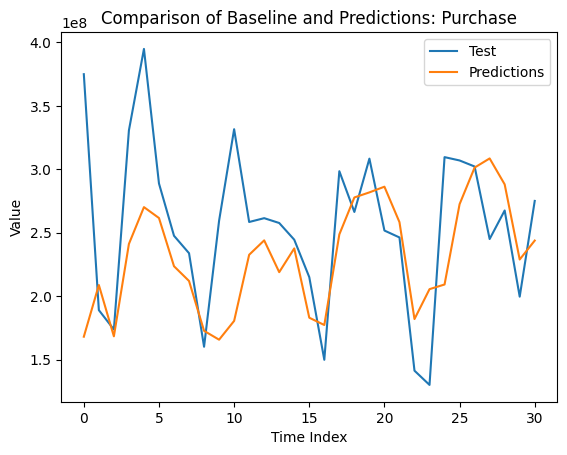

In [384]:
plt.plot(actual, label='Test') 
plt.plot(predictions.flatten(), label='Predictions')
plt.title('Comparison of Baseline and Predictions: Purchase')
plt.xlabel('Time Index')
plt.ylabel('Value')
plt.legend()
plt.show() 

## Redemption

In [428]:
scaler = MinMaxScaler()
redeem_train_scaled = scaler.fit_transform(redeem_train.values.reshape(-1, 1))

In [429]:
X_train, y_train = create_dataset(redeem_train_scaled, 91, 31)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [430]:
from tensorflow.keras.optimizers import Adam
redeem_model = Sequential([
    # First Bidirectional LSTM Layer with more units
    Bidirectional(LSTM(256, return_sequences=True, activation='tanh'), input_shape=(91, 1)),
    BatchNormalization(),
    
    # Third Bidirectional LSTM Layer
    Bidirectional(LSTM(128, return_sequences=True, activation='tanh')),
    BatchNormalization(),
    
    Bidirectional(LSTM(64, return_sequences=True, activation='tanh')),
    BatchNormalization(),
    
    # Final, Single LSTM Layer to prepare for the output
    LSTM(31, activation='tanh'),

    # Output layer; predicting 31 future points
    Dense(31)
])

redeem_model.compile(optimizer=Adam(learning_rate=0.005), loss='mape')

early_stopping = EarlyStopping(monitor='val_loss', patience=20, min_delta=0.0001,restore_best_weights=True, verbose=1)


# Train the model
redeem_model.fit(X_train, y_train, epochs=90, batch_size=15, verbose=1,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/90
15/15 [==============================] - 7s 219ms/step - loss: 114.1020 - val_loss: 73.1314
Epoch 2/90
15/15 [==============================] - 2s 164ms/step - loss: 53.2497 - val_loss: 47.3294
Epoch 3/90
15/15 [==============================] - 2s 167ms/step - loss: 47.7588 - val_loss: 47.9744
Epoch 4/90
15/15 [==============================] - 3s 169ms/step - loss: 47.6105 - val_loss: 43.7396
Epoch 5/90
15/15 [==============================] - 2s 165ms/step - loss: 44.7782 - val_loss: 34.9907
Epoch 6/90
15/15 [==============================] - 2s 167ms/step - loss: 44.8633 - val_loss: 32.4713
Epoch 7/90
15/15 [==============================] - 3s 169ms/step - loss: 42.2509 - val_loss: 35.7471
Epoch 8/90
15/15 [==============================] - 3s 169ms/step - loss: 41.2342 - val_loss: 33.1634
Epoch 9/90
15/15 [==============================] - 3s 168ms/step - loss: 40.8892 - val_loss: 35.5304
Epoch 10/90
15/15 [==============================] - 2s 167ms/step - loss: 40.420

In [431]:
# Predict using the last sequence from train data
last_sequence = redeem_train_scaled[-91:].reshape((1, 91, 1))
predicted_scaled = redeem_model.predict(last_sequence)

# Inverse transform to get predictions in original scale
predictions= scaler.inverse_transform(predicted_scaled.flatten().reshape(-1, 1))

1/1 [==============================] - 1s 962ms/step


In [432]:
# Assuming purchase_test.values and predicted are numpy arrays and have the same shape
actual = redeem_test.values

mape = np.mean(np.abs((actual - predictions) / actual)) * 100
print("MAPE:", mape)

MAPE: 25.018783850335847


In [433]:
redeem_test.values

array([252540858, 172250225, 127125217, 322907524, 221706539, 282346594,
       253659514, 311648757, 163611708, 189909225, 418603336, 309754858,
       303975517, 211939431, 236516007, 219214339, 139564084, 259169016,
       254929877, 202452782, 219963356, 179349206, 199377531, 191080151,
       312413411, 285478563, 468164147, 297893861, 273756380, 196374134,
       292943033])

In [434]:
predictions

array([[3.0074272e+08],
       [2.2166125e+08],
       [2.1928722e+08],
       [1.9630422e+08],
       [2.0443554e+08],
       [2.5338733e+08],
       [2.1112954e+08],
       [2.3208606e+08],
       [2.1904149e+08],
       [2.3375267e+08],
       [2.4253032e+08],
       [2.4947077e+08],
       [2.4239419e+08],
       [2.5465242e+08],
       [2.0627451e+08],
       [2.5198710e+08],
       [2.5123704e+08],
       [2.6009725e+08],
       [2.1686566e+08],
       [2.8483286e+08],
       [2.5962998e+08],
       [2.7093389e+08],
       [2.2100405e+08],
       [2.3795086e+08],
       [2.3172706e+08],
       [2.3757541e+08],
       [2.4429590e+08],
       [2.5569101e+08],
       [2.3796077e+08],
       [2.7215539e+08],
       [2.3730627e+08]], dtype=float32)

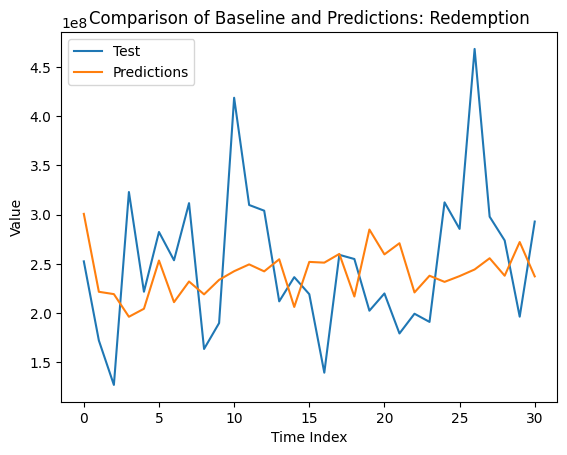

In [435]:
plt.plot(actual, label='Test') 
plt.plot(predictions, label='Predictions')
plt.title('Comparison of Baseline and Predictions: Redemption')
plt.xlabel('Time Index')
plt.ylabel('Value')
plt.legend()
plt.show() 

# Comparison with Previous Baseline Prediction

In [476]:
baseline_prediction = pd.read_csv('/Users/yupengshen/DA_portfolio/cashflow/baseline_result.csv')

In [477]:
baseline_prediction

,date,total_purchase_amt_base,total_redeem_amt_base
0,2014-09-01,3.933503e+08,3.066653e+08
1,2014-09-02,3.085214e+08,2.570847e+08
2,2014-09-03,3.430706e+08,3.486316e+08
3,2014-09-04,3.555449e+08,2.860506e+08
4,2014-09-05,2.909838e+08,2.508833e+08
5,2014-09-06,2.184999e+08,1.688910e+08
6,2014-09-07,1.928032e+08,1.710349e+08
7,2014-09-08,3.528802e+08,3.233303e+08
8,2014-09-09,3.551925e+08,2.869784e+08
9,2014-09-10,3.947967e+08,3.046577e+08


In [478]:
purchase_full = data["total_purchase_amt"]
redeem_full = data['total_redeem_amt']

In [468]:
scaler = StandardScaler()
purchase_full_scaled = scaler.fit_transform(purchase_full.values.reshape(-1, 1))


In [479]:
scaler = MinMaxScaler()
redeem_full_scaled = scaler.fit_transform(redeem_full.values.reshape(-1, 1))


In [480]:
# Assuming `redeem_data_scaled` includes both training and test data scaled
X_Purchase_full, y_Purchase_full = create_dataset(purchase_full_scaled, 91, 31)
X_Purchase_full = X_Purchase_full.reshape((X_Purchase_full.shape[0], X_Purchase_full.shape[1], 1))

X_Redeem_full, y_Redeem_full = create_dataset(redeem_full_scaled, 91, 31)
X_Redeem_full = X_Redeem_full.reshape((X_Redeem_full.shape[0], X_Redeem_full.shape[1], 1))


## Purchase

In [470]:
purchase_model.fit(X_Purchase_full, y_Purchase_full, epochs=70, batch_size=16, verbose=1, validation_split=0.2)


Epoch 1/70
16/16 [==============================] - 3s 155ms/step - loss: 152.5189 - val_loss: 193.6856
Epoch 2/70
16/16 [==============================] - 2s 150ms/step - loss: 115.6865 - val_loss: 155.5832
Epoch 3/70
16/16 [==============================] - 3s 180ms/step - loss: 114.8627 - val_loss: 147.7452
Epoch 4/70
16/16 [==============================] - 3s 178ms/step - loss: 111.2896 - val_loss: 137.3097
Epoch 5/70
16/16 [==============================] - 3s 160ms/step - loss: 107.3717 - val_loss: 132.9792
Epoch 6/70
16/16 [==============================] - 2s 144ms/step - loss: 104.3048 - val_loss: 129.7417
Epoch 7/70
16/16 [==============================] - 3s 176ms/step - loss: 103.9310 - val_loss: 125.3831
Epoch 8/70
16/16 [==============================] - 4s 223ms/step - loss: 102.4034 - val_loss: 128.2171
Epoch 9/70
16/16 [==============================] - 3s 181ms/step - loss: 101.8094 - val_loss: 126.8209
Epoch 10/70
16/16 [==============================] - 3s 174ms/st

In [471]:
last_sequence = purchase_full_scaled[-91:].reshape((1, 91, 1))
predicted_scaled = purchase_model.predict(last_sequence)
purchase_predictions = scaler.inverse_transform(predicted_scaled.flatten().reshape(-1, 1))


1/1 [==============================] - 0s 32ms/step


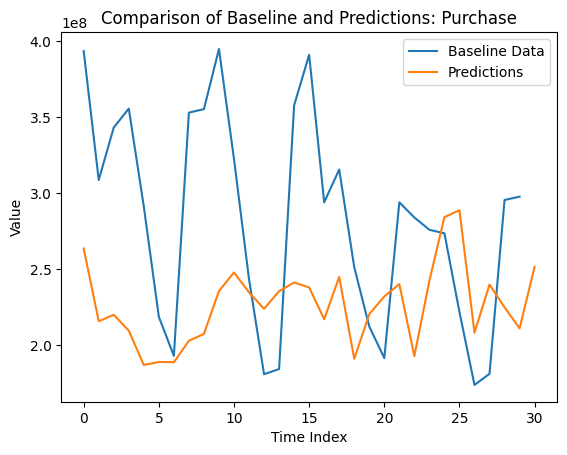

In [472]:
plt.plot(baseline_prediction['total_purchase_amt_base'], label='Baseline Data') 
plt.plot(purchase_predictions, label='Predictions')
plt.title('Comparison of Baseline and Predictions: Purchase')
plt.xlabel('Time Index')
plt.ylabel('Value')
plt.legend()
plt.show() 

## Redemption

In [481]:
redeem_model.fit(X_Redeem_full, y_Redeem_full, epochs=90, batch_size=16, verbose=1, validation_split=0.2)

Epoch 1/90


16/16 [==============================] - 2s 147ms/step - loss: 18.2691 - val_loss: 25.8516
Epoch 2/90
16/16 [==============================] - 2s 141ms/step - loss: 18.0472 - val_loss: 26.8884
Epoch 3/90
16/16 [==============================] - 2s 140ms/step - loss: 17.8994 - val_loss: 28.3134
Epoch 4/90
16/16 [==============================] - 2s 140ms/step - loss: 18.5152 - val_loss: 26.6484
Epoch 5/90
16/16 [==============================] - 2s 146ms/step - loss: 17.9996 - val_loss: 26.2648
Epoch 6/90
16/16 [==============================] - 2s 139ms/step - loss: 17.7892 - val_loss: 28.6172
Epoch 7/90
16/16 [==============================] - 2s 142ms/step - loss: 17.5708 - val_loss: 27.0929
Epoch 8/90
16/16 [==============================] - 2s 140ms/step - loss: 17.3784 - val_loss: 26.4350
Epoch 9/90
16/16 [==============================] - 2s 141ms/step - loss: 17.4299 - val_loss: 26.5921
Epoch 10/90
16/16 [==============================] - 2s 149ms/step - loss: 17.3107 - val_loss

In [482]:
last_sequence = redeem_full_scaled[-91:].reshape((1, 91, 1))
predicted_scaled = redeem_model.predict(last_sequence)
redeem_predictions = scaler.inverse_transform(predicted_scaled.flatten().reshape(-1, 1))


1/1 [==============================] - 0s 25ms/step


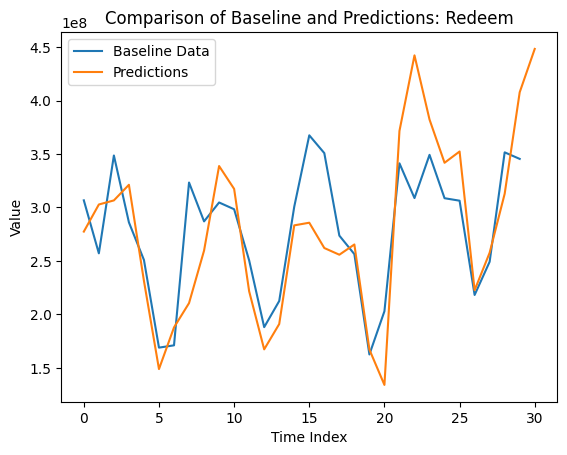

In [483]:
plt.plot(baseline_prediction['total_redeem_amt_base'], label='Baseline Data') 
plt.plot(redeem_predictions, label='Predictions')
plt.title('Comparison of Baseline and Predictions: Redeem')
plt.xlabel('Time Index')
plt.ylabel('Value')
plt.legend()
plt.show() 